In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

data_gen = ImageDataGenerator()

image_height = 128
image_width = 128
batch_size = 32

train = tf.keras.preprocessing.image_dataset_from_directory(
    'data/chest_xray/train',
    labels="inferred",
    seed = 123,
    image_size = (image_height, image_width),
    batch_size=batch_size,
    label_mode="binary"
)
test = tf.keras.preprocessing.image_dataset_from_directory(
    'data/chest_xray/test',
    labels="inferred",
    seed = 123,
    image_size = (image_height, image_width),
    batch_size=batch_size,
    label_mode="binary"
)

Found 5200 files belonging to 2 classes.
Found 620 files belonging to 2 classes.


In [6]:
model = Sequential()
model.add(Dropout(0.2, input_shape=(image_height, image_width, 3)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096, activation='relu'))
model.add(Dense(units=4096, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(units=1, activation='sigmoid'))

In [7]:
opt = Adam(lr=0.0005)

model.compile(optimizer=opt, loss="binary_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 64, 64, 128)       147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 128)      

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("vgg16_1.h5", monitor="val_accuracy", verbose=1,
                             save_best_only=True, save_weights_only=False, mode="auto",
                            period = 1)

early = EarlyStopping(monitor="val_accuracy", min_delta=0, patience=50, verbose=1,
                     mode="auto")

hist = model.fit_generator(steps_per_epoch=163, generator=train, validation_data=test,
                          validation_steps=20, epochs=100, callbacks=[checkpoint, early])



Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
163/163 [==============================] - ETA: 0s - loss: 0.9933 - accuracy: 0.7306
Epoch 00001: val_accuracy improved from -inf to 0.62258, saving model to vgg16_1.h5
163/163 [==============================] - 57s 352ms/step - loss: 0.9933 - accuracy: 0.7306 - val_loss: 0.6779 - val_accuracy: 0.6226
Epoch 2/100
163/163 [==============================] - ETA: 0s - loss: 0.3728 - accuracy: 0.8321
Epoch 00002: val_accuracy improved from 0.62258 to 0.71774, saving model to vgg16_1.h5
163/163 [==============================] - 49s 300ms/step - loss: 0.3728 - accuracy: 0.8321 - val_loss: 0.6481 - val_accuracy: 0.7177
Epoch 3/100
163/163 [==============================] - ETA: 0s - loss: 0.3333 - accuracy: 0.8598
Epoch 00003: val_accuracy improved from 0.71774 to 0.72258, saving model to vgg16_1.h5
163/163 [==============================] - 49s 299ms/step - loss: 0.3333 - accuracy: 0.8598 - val_loss: 0.8

Epoch 28/100
163/163 [==============================] - ETA: 0s - loss: 0.0253 - accuracy: 0.9885
Epoch 00028: val_accuracy did not improve from 0.82742
163/163 [==============================] - 50s 309ms/step - loss: 0.0253 - accuracy: 0.9885 - val_loss: 3.0442 - val_accuracy: 0.7403
Epoch 29/100
163/163 [==============================] - ETA: 0s - loss: 0.0638 - accuracy: 0.9850
Epoch 00029: val_accuracy did not improve from 0.82742
163/163 [==============================] - 50s 307ms/step - loss: 0.0638 - accuracy: 0.9850 - val_loss: 1.4089 - val_accuracy: 0.7371
Epoch 30/100
163/163 [==============================] - ETA: 0s - loss: 0.0417 - accuracy: 0.9852
Epoch 00030: val_accuracy improved from 0.82742 to 0.83710, saving model to vgg16_1.h5
163/163 [==============================] - 53s 325ms/step - loss: 0.0417 - accuracy: 0.9852 - val_loss: 0.7045 - val_accuracy: 0.8371
Epoch 31/100
163/163 [==============================] - ETA: 0s - loss: 0.0339 - accuracy: 0.9877
Epoch 000

Epoch 57/100
163/163 [==============================] - ETA: 0s - loss: 0.0307 - accuracy: 0.9902
Epoch 00057: val_accuracy did not improve from 0.83710
163/163 [==============================] - 48s 296ms/step - loss: 0.0307 - accuracy: 0.9902 - val_loss: 4.2798 - val_accuracy: 0.7968
Epoch 58/100
163/163 [==============================] - ETA: 0s - loss: 0.0102 - accuracy: 0.9962
Epoch 00058: val_accuracy did not improve from 0.83710
163/163 [==============================] - 49s 298ms/step - loss: 0.0102 - accuracy: 0.9962 - val_loss: 4.0736 - val_accuracy: 0.8097
Epoch 59/100
163/163 [==============================] - ETA: 0s - loss: 0.0154 - accuracy: 0.9952
Epoch 00059: val_accuracy did not improve from 0.83710
163/163 [==============================] - 51s 312ms/step - loss: 0.0154 - accuracy: 0.9952 - val_loss: 3.1734 - val_accuracy: 0.8258
Epoch 60/100
163/163 [==============================] - ETA: 0s - loss: 0.0566 - accuracy: 0.9838
Epoch 00060: val_accuracy did not improve

163/163 [==============================] - ETA: 0s - loss: 0.0094 - accuracy: 0.9975
Epoch 00085: val_accuracy did not improve from 0.87903
163/163 [==============================] - 50s 304ms/step - loss: 0.0094 - accuracy: 0.9975 - val_loss: 5.6602 - val_accuracy: 0.8194
Epoch 86/100
163/163 [==============================] - ETA: 0s - loss: 2.8126e-04 - accuracy: 1.0000
Epoch 00086: val_accuracy did not improve from 0.87903
163/163 [==============================] - 50s 307ms/step - loss: 2.8126e-04 - accuracy: 1.0000 - val_loss: 6.0582 - val_accuracy: 0.8387
Epoch 87/100
163/163 [==============================] - ETA: 0s - loss: 1.6362e-04 - accuracy: 1.0000
Epoch 00087: val_accuracy did not improve from 0.87903
163/163 [==============================] - 49s 301ms/step - loss: 1.6362e-04 - accuracy: 1.0000 - val_loss: 8.3325 - val_accuracy: 0.8129
Epoch 88/100
163/163 [==============================] - ETA: 0s - loss: 6.6084e-04 - accuracy: 0.9998
Epoch 00088: val_accuracy did not 

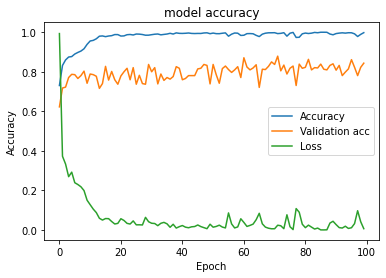

In [12]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation acc", "Loss", "Validation Loss"])
plt.show()

In [5]:
from keras.preprocessing import image
from keras.models import load_model

saved_model = load_model('vgg16_1.h5')

[[0.00213064]]


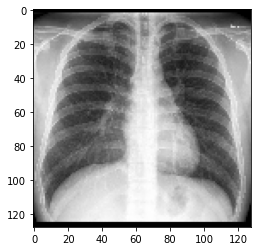

In [13]:
img = image.load_img("healty.jpg", target_size=(128, 128))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis = 0)

output = saved_model.predict(img)

print(output)